#  Fairness Analysis & Bias Trend Simulation

This notebook analyzes the **fairness of an AI model** using:  
-  Statistical Parity Difference (SPD) trend over time  
-  Bias alert when fairness threshold is crossed  

Based on the FairDeploy Dashboard’s fairness monitoring logic.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load dataset used in previous notebook
BASE_DIR = os.path.abspath("..")
data_path = os.path.join(BASE_DIR, "data", "sample_dataset.csv")

# Load dataset
df = pd.read_csv(data_path)

# Prepare features
X = df.drop(columns=['label', 'gender'])
y = df['label']


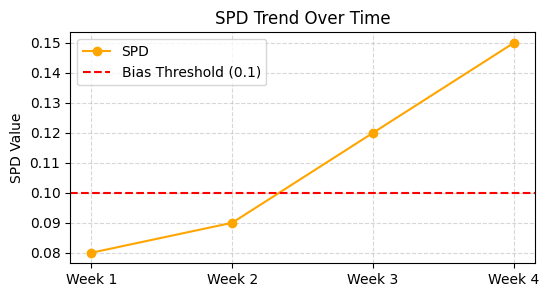

Bias Alert: SPD = 0.15 exceeds threshold!


In [22]:
# Simulated SPD values over 4 weeks
weeks = ['Week 1', 'Week 2', 'Week 3', 'Week 4']
spd_values = [0.08, 0.09, 0.12, 0.15]  # Simulated trend

# Plot SPD trend
plt.figure(figsize=(6, 3))
plt.plot(weeks, spd_values, marker='o', color='orange', label='SPD')
plt.axhline(0.1, color='red', linestyle='--', label='Bias Threshold (0.1)')
plt.title("SPD Trend Over Time")
plt.ylabel("SPD Value")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Bias Alert Check
latest_spd = spd_values[-1]
if latest_spd > 0.1:
    print(f"Bias Alert: SPD = {latest_spd:.2f} exceeds threshold!")
else:
    print(f"Fairness OK: SPD = {latest_spd:.2f}")


In [23]:
# Save fairness report to file
report_path = os.path.join(BASE_DIR, "reports", "fairness_report.txt")
os.makedirs(os.path.dirname(report_path), exist_ok=True)

with open(report_path, "w") as f:
    f.write("📈 Fairness Report\n")
    f.write(f"Latest SPD: {latest_spd:.3f}\n")
    if latest_spd > 0.1:
        f.write("⚠️ Bias Alert: SPD exceeds threshold (0.1)\n")
    else:
        f.write("✅ Fairness OK: SPD within acceptable range.\n")

print(f"📄 Fairness report saved to {report_path}")


📄 Fairness report saved to /Users/akshitamishra/Documents/projects/FairDeploy_AI Model Deployment/FairDeploy_AI_Model_Deployment/reports/fairness_report.txt


In [24]:
# If not installed:
# !pip install aif360 --quiet

from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric

import warnings
warnings.filterwarnings("ignore")


In [25]:
# Prepare dataset for AIF360
df_aif = df.copy()

# Convert to AIF360 BinaryLabelDataset
bld = BinaryLabelDataset(
    df=df_aif,
    label_names=['label'],
    protected_attribute_names=['gender']
)

# Show shape
print(f"AIF360 Dataset: {bld.features.shape[0]} rows, {bld.features.shape[1]} features")


AIF360 Dataset: 569 rows, 31 features


In [26]:
# Initialize metrics
metric = BinaryLabelDatasetMetric(bld, privileged_groups=[{'gender': 1}], unprivileged_groups=[{'gender': 0}])

# Compute metrics
spd_aif = metric.statistical_parity_difference()
di_aif = metric.disparate_impact()

# Print results
print(f"📊 Statistical Parity Difference (AIF360): {spd_aif:.3f}")
print(f"📊 Disparate Impact (AIF360): {di_aif:.3f}")

# Bias Interpretation
if abs(spd_aif) > 0.1:
    print("⚠️ SPD indicates moderate bias — may need investigation.")
else:
    print("✅ SPD within acceptable range.")

if di_aif < 0.8 or di_aif > 1.25:
    print("⚠️ DI indicates potential bias.")
else:
    print("✅ DI within acceptable range.")


📊 Statistical Parity Difference (AIF360): 0.035
📊 Disparate Impact (AIF360): 1.057
✅ SPD within acceptable range.
✅ DI within acceptable range.


In [27]:
# Append AIF360 metrics to fairness report
with open(report_path, "a") as f:
    f.write("\n--- AIF360 Metrics ---\n")
    f.write(f"Statistical Parity Difference (SPD): {spd_aif:.3f}\n")
    f.write(f"Disparate Impact (DI): {di_aif:.3f}\n")

print("📄 Extended fairness report updated with AIF360 metrics.")


📄 Extended fairness report updated with AIF360 metrics.
